In [18]:
!pip install vaex

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import rv_discrete
import statsmodels
import vaex
import rawpy
import h5py

import dask
import dask.dataframe as dd

import os
from tqdm import tqdm

import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import seaborn as sns

%matplotlib inline

In [7]:
path_raw = './raw_noise/'

rgb = np.memmap('rgb.memmap', dtype='uint8', mode='w+', shape=(1250,4498,6742,3))

files = os.listdir(path_raw)

i=0
for filename in (pbar := tqdm(files)):
    pbar.set_description(f"Processing {filename}")
    filename = os.path.join(path_raw, filename)
    raw = rawpy.imread(filename)
    rgb_read = raw.postprocess(use_camera_wb=True, output_color=rawpy.ColorSpace.sRGB)
    rgb[i] = rgb_read
    i+=1
rgb = np.reshape(rgb,(1250*4498*6742,3))
rgb.flush()

Processing iso_640__0250.CR3: 100%|██████████████████████████████████████████████| 1250/1250 [1:26:17<00:00,  4.14s/it]


In [15]:
rgb.shape

(37906895000, 3)

In [2]:
rgb = np.memmap('rgb.memmap', dtype='uint8', mode='r', shape=(37906895000, 3))

In [3]:
rgb_h5f = h5py.File('rgb.h5', 'w')
rgb_h5f.create_dataset('red', data=rgb[:,0])
rgb_h5f.create_dataset('green', data=rgb[:,1])
rgb_h5f.create_dataset('blue', data=rgb[:,2])
rgb_h5f.close()

In [3]:
vdf_rgb = vaex.open("rgb.h5")
vdf_rgb.info()

In [5]:
vdf_rgb.describe()

NameError: name 'vdf_rgb' is not defined

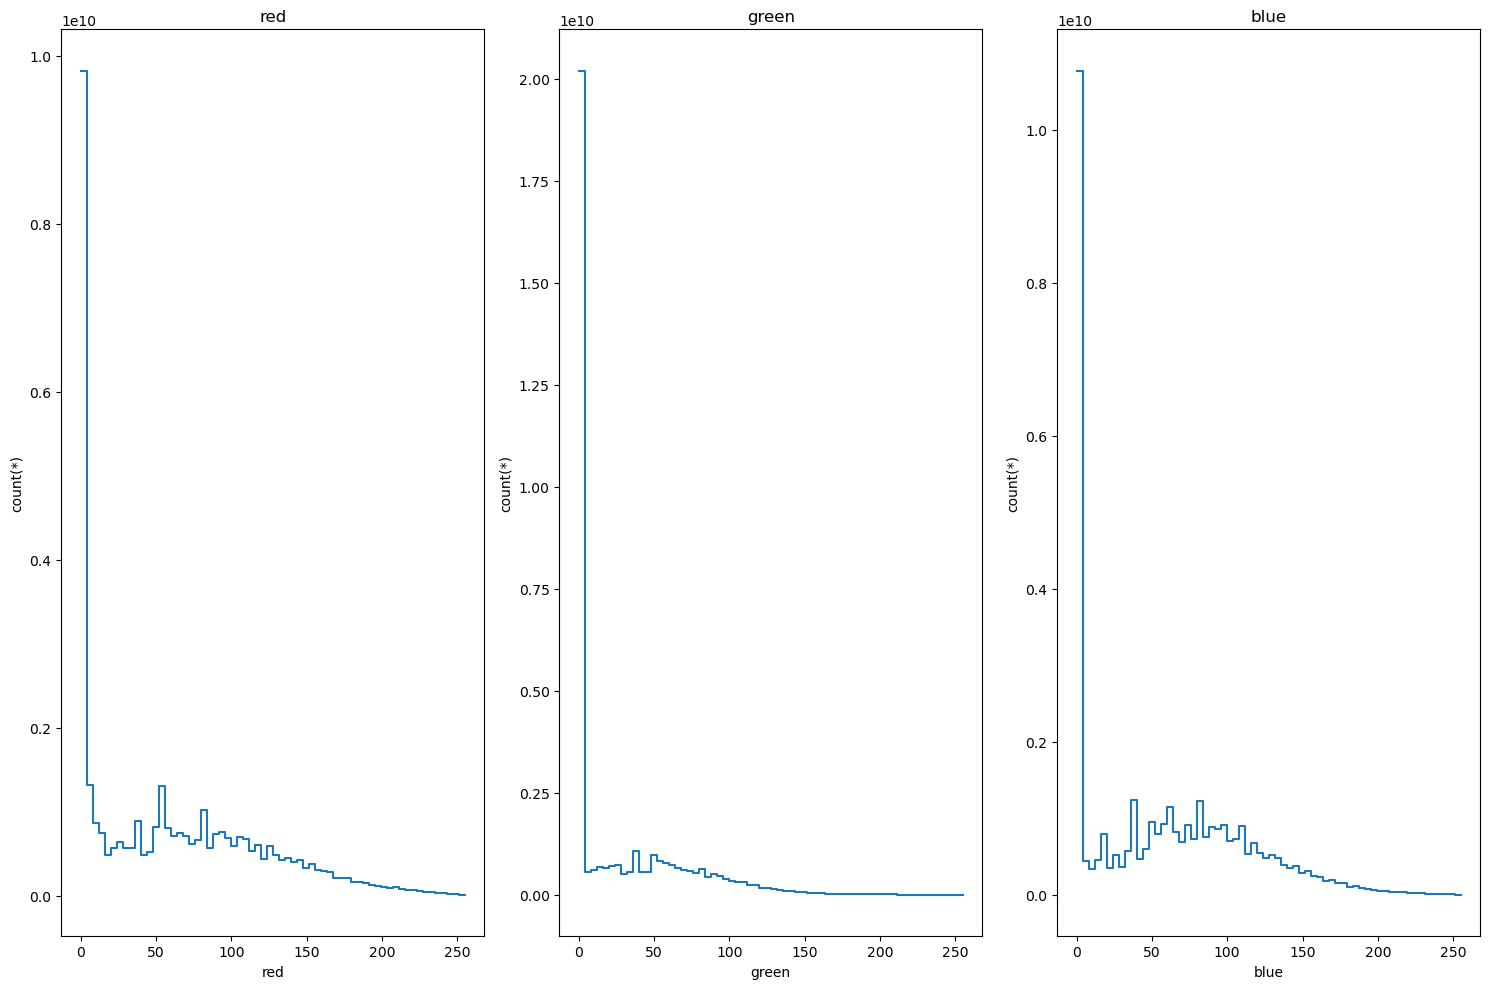

In [14]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
vdf_rgb.viz.histogram(vdf_rgb['red'])
plt.title('red')
plt.subplot(1,3,2)
vdf_rgb.viz.histogram(vdf_rgb['green'])
plt.title('green')
plt.subplot(1,3,3)
vdf_rgb.viz.histogram(vdf_rgb['blue'])
plt.title('blue')
plt.show()

In [3]:
#ddf_rgb = dask.dataframe.from_array(rgb, columns=['red', 'green', 'blue'])

In [ ]:
#desc = ddf_rgb.describe()
#desc.compute()

In [ ]:
#rgb_qntls = np.array([0,0,0])
#rgb_qntls =  np.quantile(vdf_rgb, [0.25, 0.5, 0.75])
#rgb_qntls[1] =  np.quantile(vdf_rgb[:,0], [0.25, 0.5, 0.75])
#rgb_qntls[2] =  np.quantile(vdf_rgb[:,0], [0.25, 0.5, 0.75])


In [43]:
rgb_mean =  vaex.mean(vdf_rgb)

AttributeError: module 'vaex' has no attribute 'mean'

0.0

In [4]:
rgb_quantiles = np.zeros((3,3))
rgb_quantiles[0] = vdf_rgb.percentile_approx('red', percentage=[25, 50, 75], binby='red', shape=1)[:,0]
rgb_quantiles[1] = vdf_rgb.percentile_approx('green', percentage=[25, 50, 75], binby='green', shape=1)[:,0]
rgb_quantiles[2] = vdf_rgb.percentile_approx('blue', percentage=[25, 50, 75], binby='blue', shape=1)[:,0]

In [5]:
rgb_quantiles

array([[ 1.19534694e-01,  5.28873769e+01,  1.03893324e+02],
       [-7.47080285e-03,  1.09691825e-01,  5.27512492e+01],
       [ 9.53024139e-02,  5.68201079e+01,  9.88823334e+01]])

In [ ]:
%%time
rgb_quantiles = np.zeros((3,3))
rgb_quantiles[0] = np.quantile(rgb[:,0], [0.25, 0.5, 0.75])
rgb_quantiles[1] = np.quantile(rgb[:,1], [0.25, 0.5, 0.75])
rgb_quantiles[2] = np.quantile(rgb[:,2], [0.25, 0.5, 0.75])

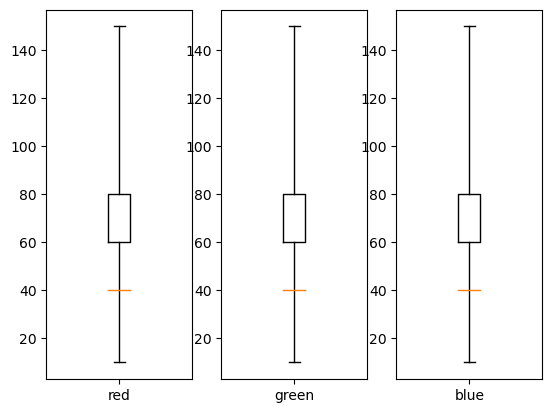

In [37]:
fig, axes = plt.subplots(1,3)
labels = ['red', 'green', 'blue']
stats = []
for i in range(len(labels)):
    stat = {}
    stat['label'] = labels[i]
    stat['mean'] = 20
    stat['med'] = 40
    stat['q1'] = 60
    stat['q3'] = 80
    stat['whislo'] = 10
    stat['whishi'] = 150
    stat["fliers"] = []
    #stats.append(stat)
    axes[i].bxp([stat])

In [23]:
vec_counts_r = np.unique(rgb[:,0], return_counts=True)
vec_counts_g = np.unique(rgb[:,1], return_counts=True)
vec_counts_b = np.unique(rgb[:,2], return_counts=True)
length = len(rgb_r.flatten())

In [24]:
vec_x_r = vec_counts_r[0]
vec_p_r = vec_counts_r[1].astype('float32')/length

vec_x_g = vec_counts_g[0]
vec_p_g = vec_counts_g[1].astype('float32')/length

vec_x_b = vec_counts_b[0]
vec_p_b = vec_counts_b[1].astype('float32')/length

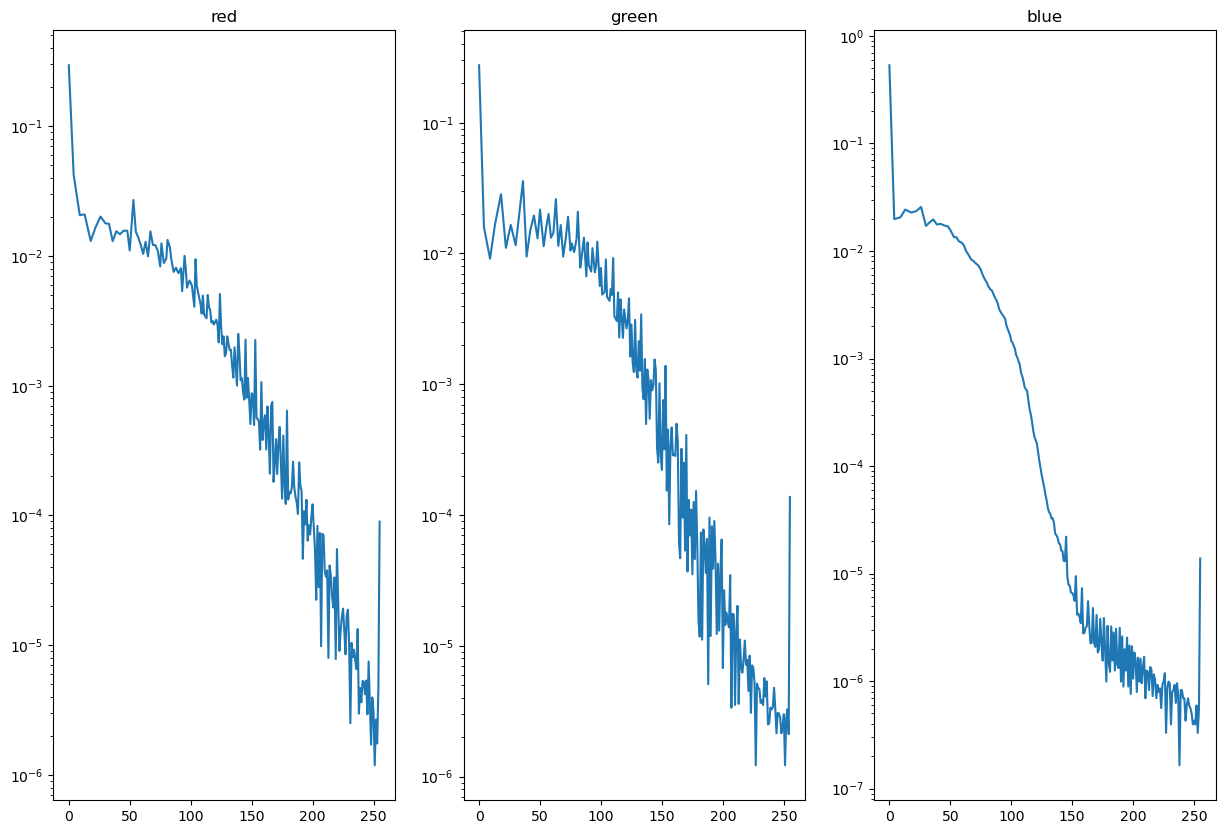

In [25]:
plt.subplots(1,3, figsize=(15,10))
plt.subplot(1,3,1)
plt.plot(vec_x_r, vec_p_r)
plt.yscale('log')
plt.title('red')
plt.subplot(1,3,2)
plt.plot(vec_x_g, vec_p_g)
plt.yscale('log')
plt.title('green')
plt.subplot(1,3,3)
plt.plot(vec_x_b, vec_p_b)
plt.yscale('log')
plt.title('blue')
plt.show()

In [30]:
sum(vec_p_r)

0.9999999999999994